# Setup

Only run setup commands if you are working a Colab Notebook

In [ ]:
from google.colab import files 
files.upload() 

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:22<00:00, 101MB/s] 
100% 2.29G/2.29G [00:22<00:00, 111MB/s]


In [ ]:
!ls 
!unzip chest-xray-pneumonia.zip

# Now the training of our CNN

Importing dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras   
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Model Architecture

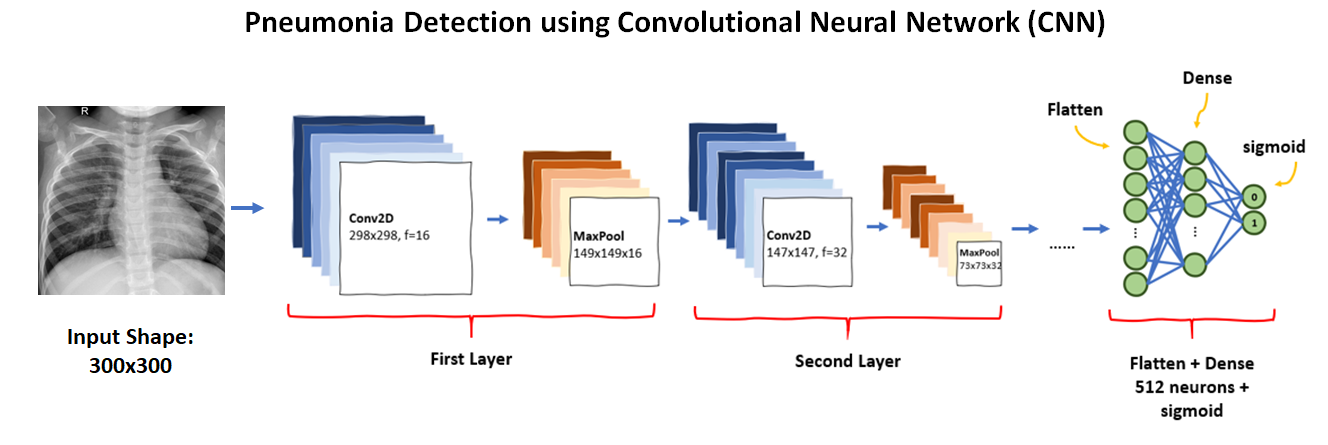

In [ ]:
classifier = tf.keras.Sequential([
                  tf.keras.layers.Convolution2D(32,(3,3), input_shape = (64,64,3)),
                  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
                  tf.keras.layers.Convolution2D(32, (3,3), activation='relu'),
                  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
                  tf.keras.layers.Dropout(0.2), 
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(units = 128, activation = 'relu'),
                  tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
                  ])

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

**Here comes the training loop!** 

Here meaures have been take for the model to be versatile - for example, if it receives a rotated or zoomed in image, it would fail under normal circumstances because it hasn't seen anything like that when it was training, but with the help of the ```ImageDataGenerator()``` function such bugs are avoided.  

(This model was actually run for more than 2 epochs because the accuracy that it achieved before wasn't satisfactory at all)

Having said that, if you want to try this yourself set ```epoch=10```. 10 epochs should fetch you a good accuracy on the testing set. 

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#PART 2 - FITTING CNN TO IMAGES 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
        'chest_xray/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

testing_set = test_datagen.flow_from_directory(
        'chest_xray/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

model = classifier.fit(training_set,
                    steps_per_epoch=int(2608/32),
                    epochs=2,
                    validation_data=testing_set,
                    validation_steps=int(624/32))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/2
81/81 [==============================] - 46s 563ms/step - loss: 0.1780 - accuracy: 0.9290 - val_loss: 0.3112 - val_accuracy: 0.8799
Epoch 2/2
81/81 [==============================] - 45s 553ms/step - loss: 0.1706 - accuracy: 0.9348 - val_loss: 0.3468 - val_accuracy: 0.8931


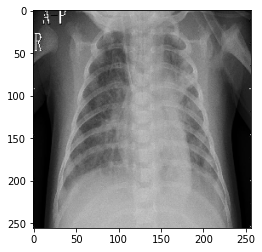

Positive


In [ ]:
input_Filename = "chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
test_image = image.load_img(input_Filename, target_size = (64, 64)) # loading image
test_image = image.img_to_array(test_image) # converting image to an array of values
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image) # predict class of the image
training_set.class_indices 
if result[0][0] == 1.:
  prediction = 'Positive'
else:
  prediction = 'Negative'
test_image = load_img(input_Filename, target_size=(256,256))
plt.imshow(test_image)
plt.show() # show the input_Filename 
print(prediction) # print the final prediction 